In [132]:
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import models


import seaborn as sns
import datetime
import tensorflow as tf


In [38]:
df = pd.read_csv('raw_data/merged_slim_file.csv')


In [39]:
columns = [#"reviewContext/Price per person",
        #"reviewContext/Service",
        "reviewDetailedRating/Atmosphere",
        "reviewDetailedRating/Food",
        "reviewDetailedRating/Service",
        'textTranslated'

        ]


In [40]:
data = pd.DataFrame()
data = df[columns]
data
data.dropna(inplace=True)


/var/folders/tf/p2lnrrsd13l0cf29lj0h0ykh0000gn/T/ipykernel_85318/3500016421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [41]:
data.isnull().sum()


reviewDetailedRating/Atmosphere    0
reviewDetailedRating/Food          0
reviewDetailedRating/Service       0
textTranslated                     0
dtype: int64

In [42]:
data


,reviewDetailedRating/Atmosphere,reviewDetailedRating/Food,reviewDetailedRating/Service,textTranslated
0,5.0,5.0,5.0,Very friendly staff. Despite the restaurant be...
1,5.0,5.0,5.0,Yummy. With very friendly service right at the...
2,5.0,5.0,5.0,It doesn't get any better!
3,5.0,5.0,5.0,We had lunch there with two dogs.\nThe staff w...
4,5.0,5.0,5.0,Looks good restaurant and super warm and frien...
...,...,...,...,...
122483,4.0,5.0,5.0,"Very tasty pizza, huge and not very expensive...."
122490,5.0,5.0,5.0,The pizzas are a hit 😀
122492,2.0,4.0,4.0,An unbearably high noise level.
122496,5.0,5.0,5.0,"Very friendly service, pleasant atmosphere, pr..."


In [138]:
y_columns = ["reviewDetailedRating/Atmosphere",
        #"reviewDetailedRating/Food",
        #"reviewDetailedRating/Service"
        ]


In [139]:
y = data[y_columns].values
X = data['textTranslated'].values


In [140]:
X


array(['Very friendly staff. Despite the restaurant being full, the food was served quickly. The price/performance ratio is right',
       'Yummy. With very friendly service right at the English Garden',
       "It doesn't get any better!", ...,
       'An unbearably high noise level.',
       'Very friendly service, pleasant atmosphere, price:performance very satisfied :-D',
       'Food was delicious as always, large pizza, very nice staff'],
      dtype=object)

In [141]:
X_words = [text_to_word_sequence(sentence) for sentence in X]
X_words


[['very',
  'friendly',
  'staff',
  'despite',
  'the',
  'restaurant',
  'being',
  'full',
  'the',
  'food',
  'was',
  'served',
  'quickly',
  'the',
  'price',
  'performance',
  'ratio',
  'is',
  'right'],
 ['yummy',
  'with',
  'very',
  'friendly',
  'service',
  'right',
  'at',
  'the',
  'english',
  'garden'],
 ['it', "doesn't", 'get', 'any', 'better'],
 ['we',
  'had',
  'lunch',
  'there',
  'with',
  'two',
  'dogs',
  'the',
  'staff',
  'was',
  'friendly',
  'and',
  'there',
  'is',
  'a',
  'bowl',
  'of',
  'water',
  'for',
  'dogs',
  'outside',
  'the',
  'food',
  'was',
  'very',
  'tasty',
  'and',
  'the',
  'price',
  'performance',
  'ratio',
  'was',
  'fair',
  'the',
  'waiting',
  'time',
  'was',
  'ok',
  'the',
  'photo',
  'shows',
  'the',
  'bowl',
  'with',
  'basil',
  'couscous',
  'zucchini',
  'spaghetti',
  'and',
  'falafels'],
 ['looks',
  'good',
  'restaurant',
  'and',
  'super',
  'warm',
  'and',
  'friendly',
  'staff',
  'i',
  

In [142]:

tk = Tokenizer()
tk.fit_on_texts(X_words)
X_tokens = tk.texts_to_sequences(X)

# Vocab size?
vocab_size = len(tk.word_index)
vocab_size


9436

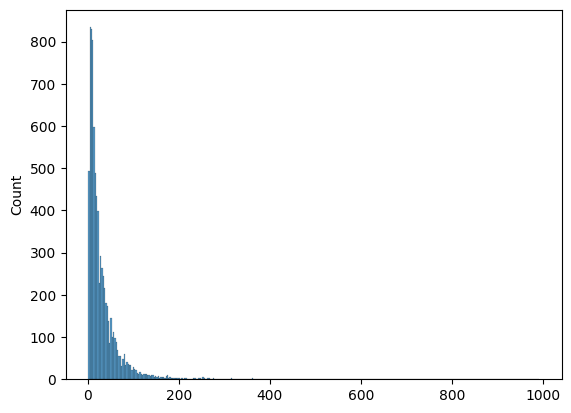

In [143]:
sns.histplot([len(x) for x in X_tokens]);


In [144]:
# Choose max_length_padding
maxlen = 100


In [145]:

X_pad = pad_sequences(X_tokens, dtype=float, padding='post', maxlen=maxlen)
X_pad.shape


(8155, 100)

In [157]:
np.unique(y, return_counts=True)


(array([1., 2., 3., 4., 5.]), array([ 277,  218,  715, 1933, 5012]))

### NLP model

In [146]:
# Embedding size?
embedding_size = 100


In [163]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)


# def build_model_nlp():
#     model = Sequential([
#         layers.Embedding(input_dim=vocab_size+1, input_length=maxlen, output_dim=embedding_size, mask_zero=True),
#         layers.Conv1D(10, kernel_size=15, padding='same', activation="relu"),
#         layers.Conv1D(10, kernel_size=10, padding='same', activation="relu"),
#         layers.Flatten(),
#         layers.Dense(30, activation='relu'),
#         layers.Dropout(0.15),
#         layers.Dense(1, activation='linear'),
#     ])

#     model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
#                   optimizer='adam', metrics=['accuracy'])
#     return model

# model_nlp = build_model_nlp()

def build_model_nlp():
    model = Sequential([
        layers.Embedding(input_dim=vocab_size+1, input_length=maxlen, output_dim=embedding_size, mask_zero=True),
        layers.Conv1D(32, kernel_size=3, padding='same', activation='relu'),
        layers.Conv1D(64, kernel_size=3, padding='same', activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='linear'),
    ])

    model.compile(loss='mean_squared_error', # Using mean squared error for regression
                  optimizer=Adam(), metrics=['mae'])  # Mean Absolute Error as a metric
    return model

model_nlp = build_model_nlp()

model_nlp.summary()


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 100, 100)          943700    
                                                                 
 conv1d_48 (Conv1D)          (None, 100, 32)           9632      
                                                                 
 conv1d_49 (Conv1D)          (None, 100, 64)           6208      
                                                                 
 flatten_24 (Flatten)        (None, 6400)              0         
                                                                 
 dense_52 (Dense)            (None, 128)               819328    
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 1)               

In [161]:

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


In [164]:
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

es = EarlyStopping(patience=15)

model_nlp = build_model_nlp()
model_nlp.fit(X_pad, y,
          validation_split=0.3,
          epochs=50,
          batch_size=32,
          callbacks=[es, tensorboard_callback]
          )


Epoch 1/50
179/179 [==============================] - 2s 9ms/step - loss: 1.7200 - mae: 0.9783 - val_loss: 0.8131 - val_mae: 0.6507
Epoch 2/50
179/179 [==============================] - 1s 8ms/step - loss: 0.9355 - mae: 0.7626 - val_loss: 0.6991 - val_mae: 0.6419
Epoch 3/50
179/179 [==============================] - 1s 8ms/step - loss: 0.8097 - mae: 0.7065 - val_loss: 0.7359 - val_mae: 0.6784
Epoch 4/50
179/179 [==============================] - 1s 8ms/step - loss: 0.6926 - mae: 0.6586 - val_loss: 0.8488 - val_mae: 0.7641
Epoch 5/50
179/179 [==============================] - 2s 8ms/step - loss: 0.6413 - mae: 0.6380 - val_loss: 0.6894 - val_mae: 0.6088
Epoch 6/50
179/179 [==============================] - 2s 8ms/step - loss: 0.5853 - mae: 0.6082 - val_loss: 0.7312 - val_mae: 0.6715
Epoch 7/50
179/179 [==============================] - 1s 8ms/step - loss: 0.5363 - mae: 0.5794 - val_loss: 0.6971 - val_mae: 0.6565
Epoch 8/50
179/179 [==============================] - 1s 8ms/step - loss: 0.

In [135]:
def initialize_model():

    #############################
    #  1 - Model architecture   #
    #############################

    model = models.Sequential()

    model.add(layers.Dense(50, activation='relu', input_dim=X_pad.shape[1])) # 1st hidden
    #model.add(layers.Dense(10, activation='relu')) #
    #model.add(layers.Dense(5, activation='relu')) # 3rd hidden layer



    model.add(layers.Dense(3, activation='softmax')) # Output layer that outputs a probability of belonging


    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


model = initialize_model()


In [136]:
model.fit(X_pad, y,
          validation_split=0.3,
          epochs=50,
          batch_size=32,
          callbacks=[es]
          )


Epoch 1/50
179/179 [==============================] - 0s 978us/step - loss: 7070.8740 - accuracy: 0.1526 - val_loss: 14125.3779 - val_accuracy: 0.1226
Epoch 2/50
179/179 [==============================] - 0s 662us/step - loss: 23211.7832 - accuracy: 0.0993 - val_loss: 36001.9219 - val_accuracy: 0.0919
Epoch 3/50
179/179 [==============================] - 0s 660us/step - loss: 38222.2266 - accuracy: 0.0923 - val_loss: 43492.5703 - val_accuracy: 0.0813
Epoch 4/50
179/179 [==============================] - 0s 653us/step - loss: 43489.3945 - accuracy: 0.0830 - val_loss: 47020.9609 - val_accuracy: 0.1099
Epoch 5/50
179/179 [==============================] - 0s 654us/step - loss: 44831.9336 - accuracy: 0.0937 - val_loss: 51667.1172 - val_accuracy: 0.0944
Epoch 6/50
179/179 [==============================] - 0s 666us/step - loss: 50821.7617 - accuracy: 0.0950 - val_loss: 56870.7227 - val_accuracy: 0.0973
Epoch 7/50
179/179 [==============================] - 0s 650us/step - loss: 57142.2188 - 

In [125]:
df_test = pd.read_csv('raw_data/Pepenero Schwabing.csv')


In [126]:
df_test_ = pd.DataFrame()
df_test_ = df_test[columns]

df_test_.dropna(inplace=True)


/var/folders/tf/p2lnrrsd13l0cf29lj0h0ykh0000gn/T/ipykernel_85318/967107971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_.dropna(inplace=True)


In [127]:
df_test_


,reviewDetailedRating/Atmosphere,reviewDetailedRating/Food,reviewDetailedRating/Service,textTranslated
1,3.0,5.0,3.0,"Love the pizza here. The wine list is good, bu..."
3,3.0,5.0,3.0,"Service could be better, pizza was very good."
10,5.0,5.0,5.0,The Risotto Mare was one of the best I have ev...
13,1.0,1.0,1.0,Very rude and left out in the cold!
14,5.0,4.0,5.0,I had Spaghetti Calamari today. It was delicio...
...,...,...,...,...
213,5.0,3.0,4.0,The former heart of Schwabing. I used to reall...
214,4.0,5.0,5.0,Unfortunately it became quite expensive for th...
217,5.0,4.0,5.0,Restaurant with excellent service. Food is sol...
220,5.0,5.0,5.0,"Excellent food, beautiful ambience, friendly s..."


In [128]:
y_test = df_test_[y_columns].values
X_test = df_test_['textTranslated'].values


In [129]:
X_words_test = [text_to_word_sequence(sentence) for sentence in X_test]
X_words_test


[['love',
  'the',
  'pizza',
  'here',
  'the',
  'wine',
  'list',
  'is',
  'good',
  'but',
  'a',
  'little',
  'tip',
  'if',
  'terlan',
  'then',
  'the',
  'sauvignon',
  'blanc',
  '😊'],
 ['service', 'could', 'be', 'better', 'pizza', 'was', 'very', 'good'],
 ['the',
  'risotto',
  'mare',
  'was',
  'one',
  'of',
  'the',
  'best',
  'i',
  'have',
  'ever',
  'eaten',
  'the',
  'others',
  'at',
  'the',
  'table',
  'were',
  'also',
  'very',
  'happy',
  'with',
  'their',
  'food'],
 ['very', 'rude', 'and', 'left', 'out', 'in', 'the', 'cold'],
 ['i',
  'had',
  'spaghetti',
  'calamari',
  'today',
  'it',
  'was',
  'delicious',
  'not',
  'expensive',
  'and',
  'the',
  'portions',
  'were',
  'larger',
  'than',
  'what',
  'i',
  'had',
  'in',
  'italy',
  'drinks',
  'are',
  'a',
  'bit',
  'expensive'],
 ['rather',
  'one',
  'of',
  'the',
  'worst',
  'italian',
  'restaurants',
  "i've",
  'visited',
  'the',
  'waitress',
  'was',
  'terribly',
  'bad',
  

In [130]:

X_tokens_test = tk.texts_to_sequences(X_words_test)

# # Vocab size?
# vocab_size = len(tk.word_index)
# vocab_size


In [119]:
X_pad_test = pad_sequences(X_tokens_test, dtype=float, padding='post', maxlen=maxlen)
X_pad_test.shape


(73, 100)

In [158]:
y_pred = model.predict(X_pad_test)

y_pred


3/3 [==============================] - 0s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 9.7838473e-01, 2.1615336e-02],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 9.8308510e-01, 1.6914913e-02],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 9.9999928e-01, 7.3382103e-07],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 9.2220253e-01, 7.7797450e-02],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.796

In [165]:
y_pred = model_nlp.predict(X_pad_test)

y_pred


3/3 [==============================] - 0s 3ms/step


array([[4.4570065],
       [4.545142 ],
       [4.8806024],
       [2.0638454],
       [3.7289205],
       [3.099796 ],
       [3.2523527],
       [4.546903 ],
       [3.0074797],
       [3.925434 ],
       [3.5071292],
       [1.7462661],
       [4.380815 ],
       [4.5491605],
       [4.732881 ],
       [4.6067076],
       [4.624871 ],
       [4.5369596],
       [4.3169055],
       [4.518328 ],
       [3.8649874],
       [4.0811114],
       [5.017443 ],
       [3.83113  ],
       [4.141431 ],
       [4.047774 ],
       [4.4945974],
       [4.50258  ],
       [2.8606186],
       [2.8532963],
       [4.464262 ],
       [4.2972116],
       [1.5992845],
       [4.213213 ],
       [4.366622 ],
       [3.880712 ],
       [4.8168974],
       [4.976256 ],
       [4.3086824],
       [3.9453378],
       [3.0237827],
       [5.056992 ],
       [4.02021  ],
       [4.402945 ],
       [4.6705427],
       [4.6369357],
       [4.309119 ],
       [4.5792484],
       [3.2853053],
       [4.209093 ],
